In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai' , context = 'notebook', ticks = True, grid = False)

In [10]:
#read the csv file
admission_df = pd.read_csv("G:\Online Courses\Guided Project\Admission_Predict.csv")

In [11]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
#Let's drop the serial no.
admission_df.drop('Serial No.', axis = 1, inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [13]:
#checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [14]:
#check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [15]:
#Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [16]:
#Grouping by University ranking
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C75337F6C8>,
      dtype=object)

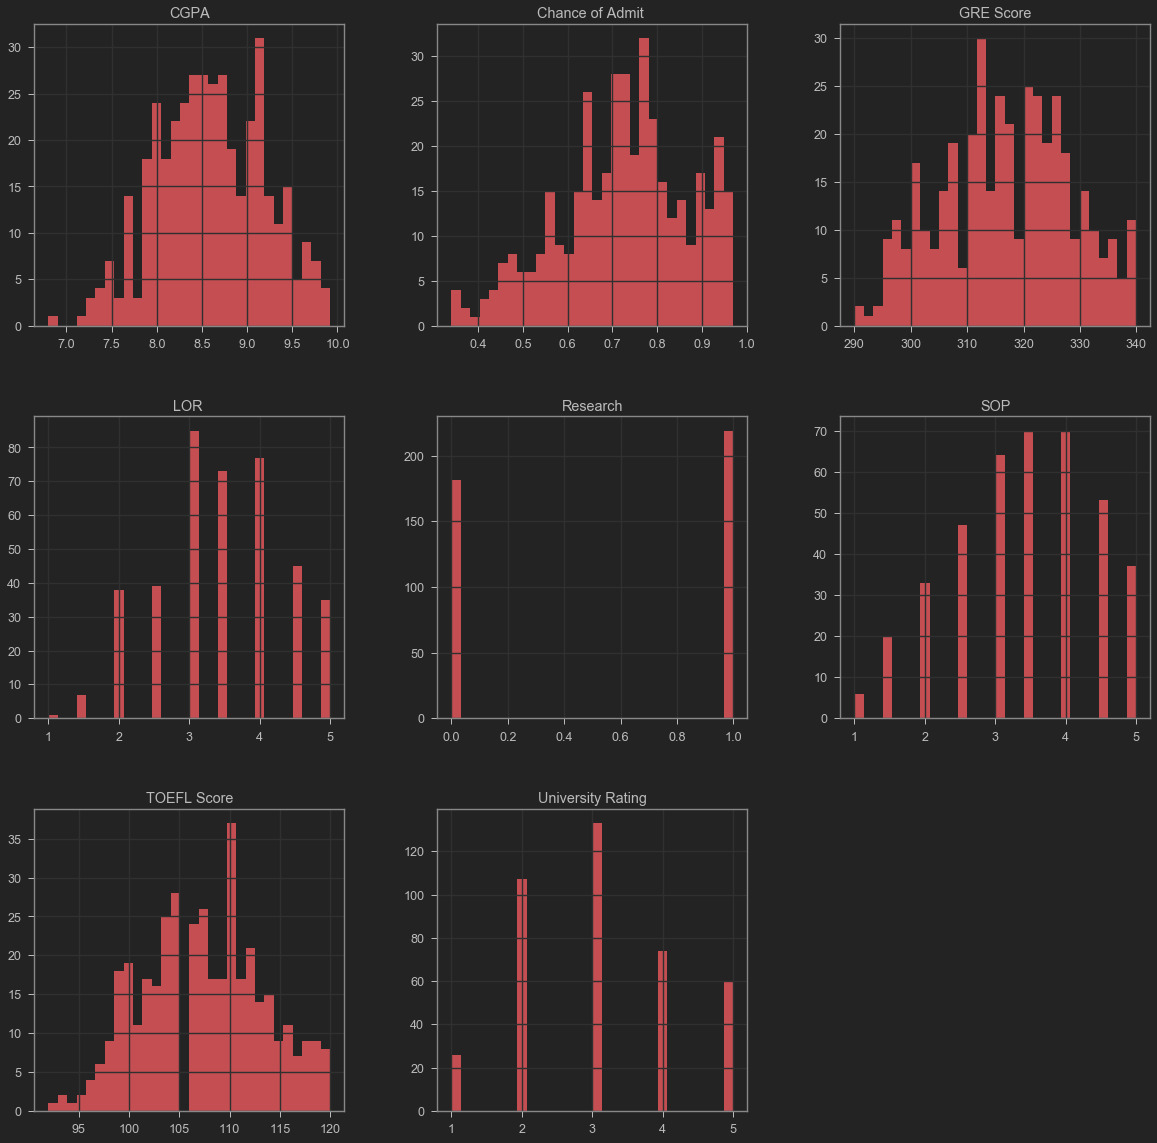

In [17]:
admission_df.hist(bins = 30, figsize = (20,20), color ='r')

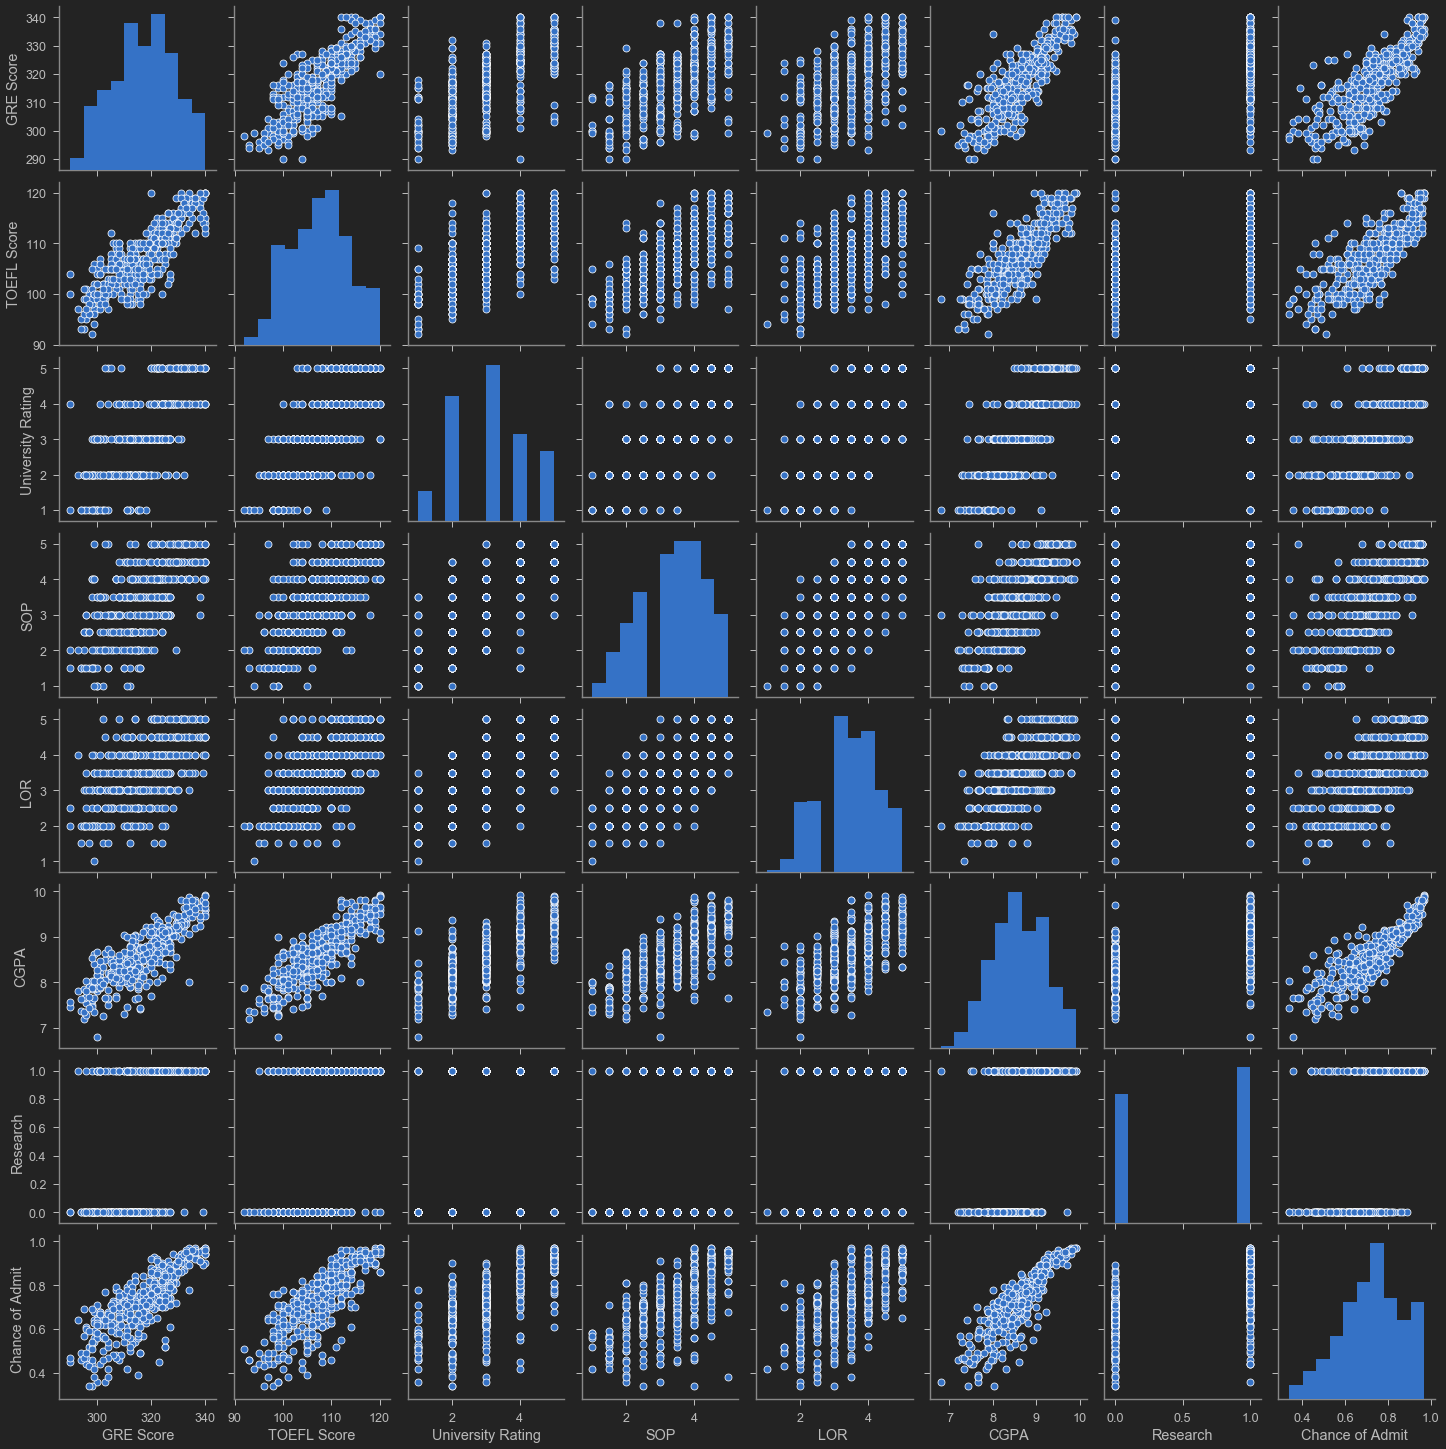

In [18]:
sns.pairplot(admission_df)

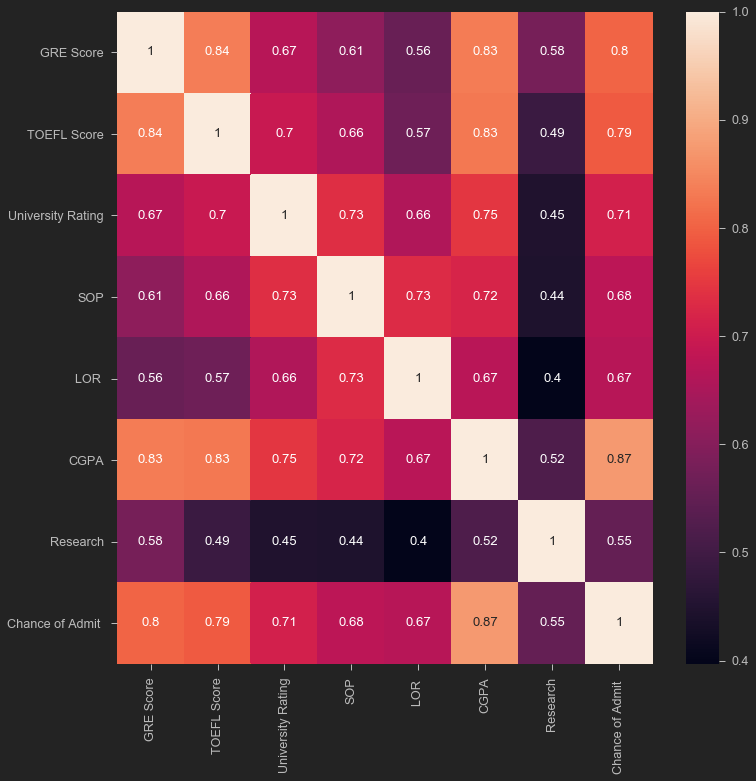

In [19]:
corr_matrix = admission_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [20]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [21]:
X = admission_df.drop(['Chance of Admit '], axis =1)

In [22]:
y = admission_df['Chance of Admit ']

In [23]:
X.shape

(400, 7)

In [24]:
y.shape

(400,)

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
y =y.reshape(-1,1)
y.shape

(400, 1)

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x= StandardScaler()
X=scaler_x.fit_transform(X)

In [91]:
scaler_y = StandardScaler()
Y = scaler_y.fit_transform(y)

In [92]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30)

In [57]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [58]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train,y_train)

LinearRegression()

In [59]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.7407845894853808

In [60]:
## Importing tensorflow for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [77]:
## ANN Algorithm
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(100))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(100))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss ='mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                400       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               5100      
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_6 (Activation)    (None, 100)              

In [78]:
ANN_model.compile( optimizer = 'Adam' ,loss = 'mean_squared_error' )

In [79]:
epochs_hist = ANN_model.fit(X_train,y_train, epochs = 80, batch_size =15)

Train on 280 samples
Epoch 1/80
280/280 [==============================] - 1s 3ms/sample - loss: 0.2178
Epoch 2/80
280/280 [==============================] - 0s 203us/sample - loss: 0.0854
Epoch 3/80
280/280 [==============================] - 0s 194us/sample - loss: 0.0432
Epoch 4/80
280/280 [==============================] - 0s 178us/sample - loss: 0.0326
Epoch 5/80
280/280 [==============================] - 0s 178us/sample - loss: 0.0214
Epoch 6/80
280/280 [==============================] - 0s 233us/sample - loss: 0.0151
Epoch 7/80
280/280 [==============================] - 0s 205us/sample - loss: 0.0134
Epoch 8/80
280/280 [==============================] - 0s 202us/sample - loss: 0.0128
Epoch 9/80
280/280 [==============================] - 0s 228us/sample - loss: 0.0087
Epoch 10/80
280/280 [==============================] - 0s 219us/sample - loss: 0.0092
Epoch 11/80
280/280 [==============================] - 0s 193us/sample - loss: 0.0093
Epoch 12/80
280/280 [=======================

In [80]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}". format(accuracy_ANN))

120/120 [==============================] - 0s 1ms/sample - loss: 0.0082
Accuracy : 0.9917542915480833


In [64]:
epochs_hist.history.keys()

dict_keys(['loss'])

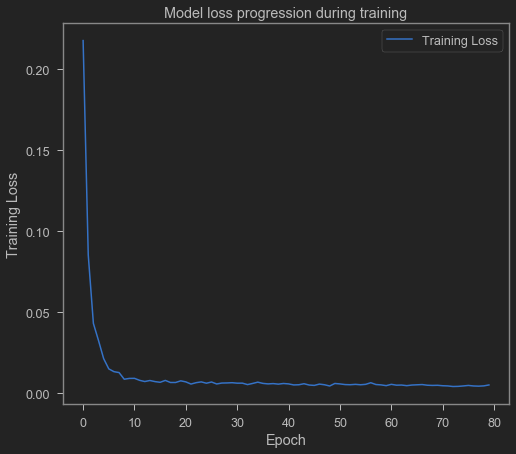

In [81]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progression during training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [83]:
##DeccisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [84]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.5967420706308559

In [85]:
##Random forest Regressor
from sklearn.ensemble import RandomForestRegressor
RandomForest_model =RandomForestRegressor(n_estimators = 100, max_depth = 8)
RandomForest_model.fit(X_train, y_train)

C:\Users\Dhruv\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(max_depth=8)

In [86]:
accuracy_randomforest = RandomForest_model.score(X_test, y_test)
accuracy_randomforest

0.7349889425511023

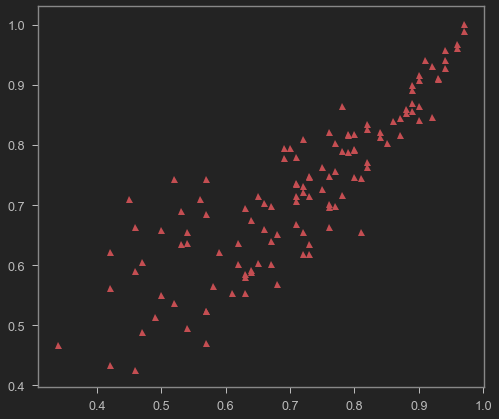

In [88]:
## Calculate Regression model KPIs
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test,y_predict, '^', color = 'r')

In [93]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

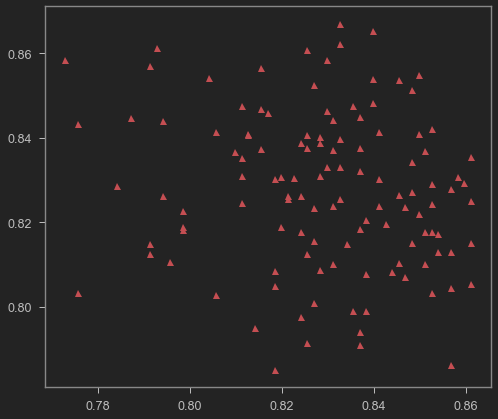

In [94]:
plt.plot(y_test_orig,y_predict_orig, '^', color = 'r')

In [97]:
k = X_test.shape[1]
n= len(X_test)
n

120

In [114]:
import sklearn.metrics 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig,y_predict_orig)
MAE = mean_absolute_error(y_test_orig,y_predict_orig)
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMSE =',MAE)

RMSE = 0.03 
MSE = 0.0008907284664233273 
MSE = 0.02461197183296802


In [116]:
import numpy as np

X = [1,2,3,4]
X = np.array(X)
X = X.reshape(-1,1)

print(X.shape)

(4, 1)
